In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anshul1004/DecisionTree/master/data_set/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.shape

(400, 5)

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1}) 

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [21]:
X = df.iloc[:,1:-1]
y = df['Purchased']

In [22]:
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Perfom Train Test Split 

In [33]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.25, random_state=24)

In [34]:
Xtrain.shape, Xtest.shape

((300, 3), (100, 3))

In [35]:
ytrain.shape, ytest.shape

((300,), (100,))

## Train The Model

In [36]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [37]:
model.fit(Xtrain, ytrain)

DecisionTreeClassifier()

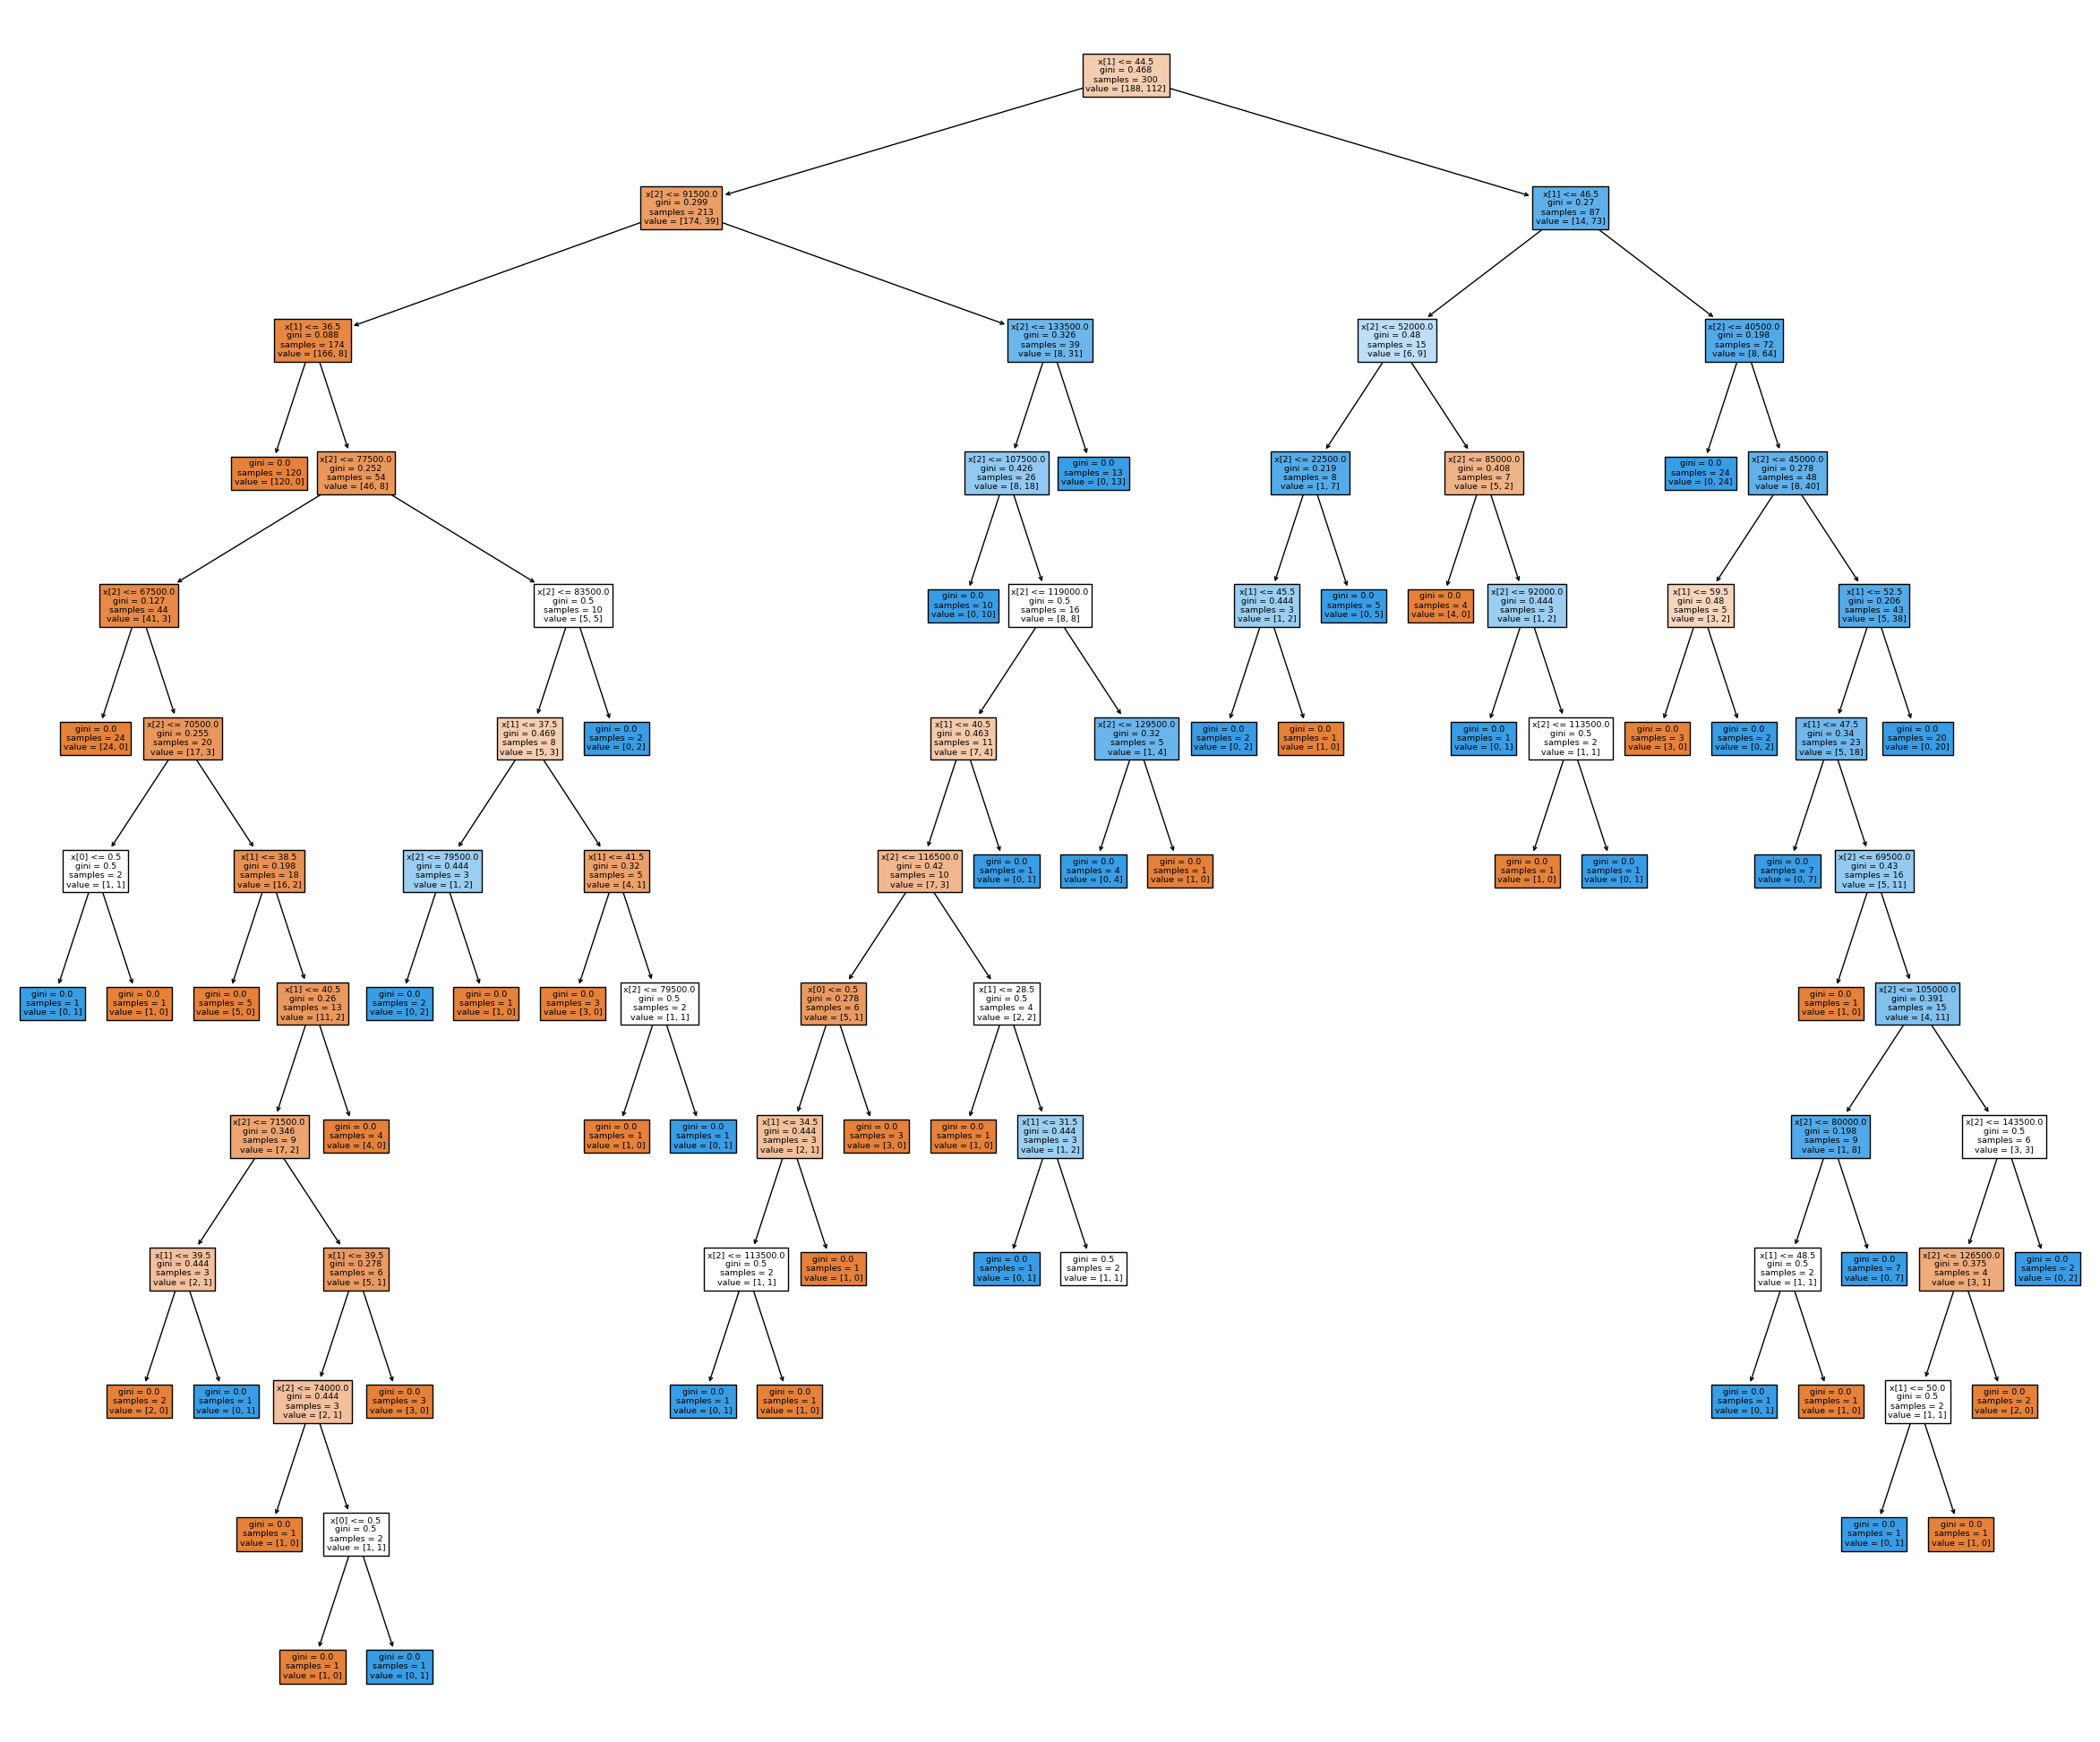

In [40]:
from sklearn import tree 

plt.figure(figsize=(30,25))
tree.plot_tree(model,filled=True)
plt.show()

In [47]:
treeclassifer = DecisionTreeClassifier(max_depth=2)

In [48]:
treeclassifer.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=2)

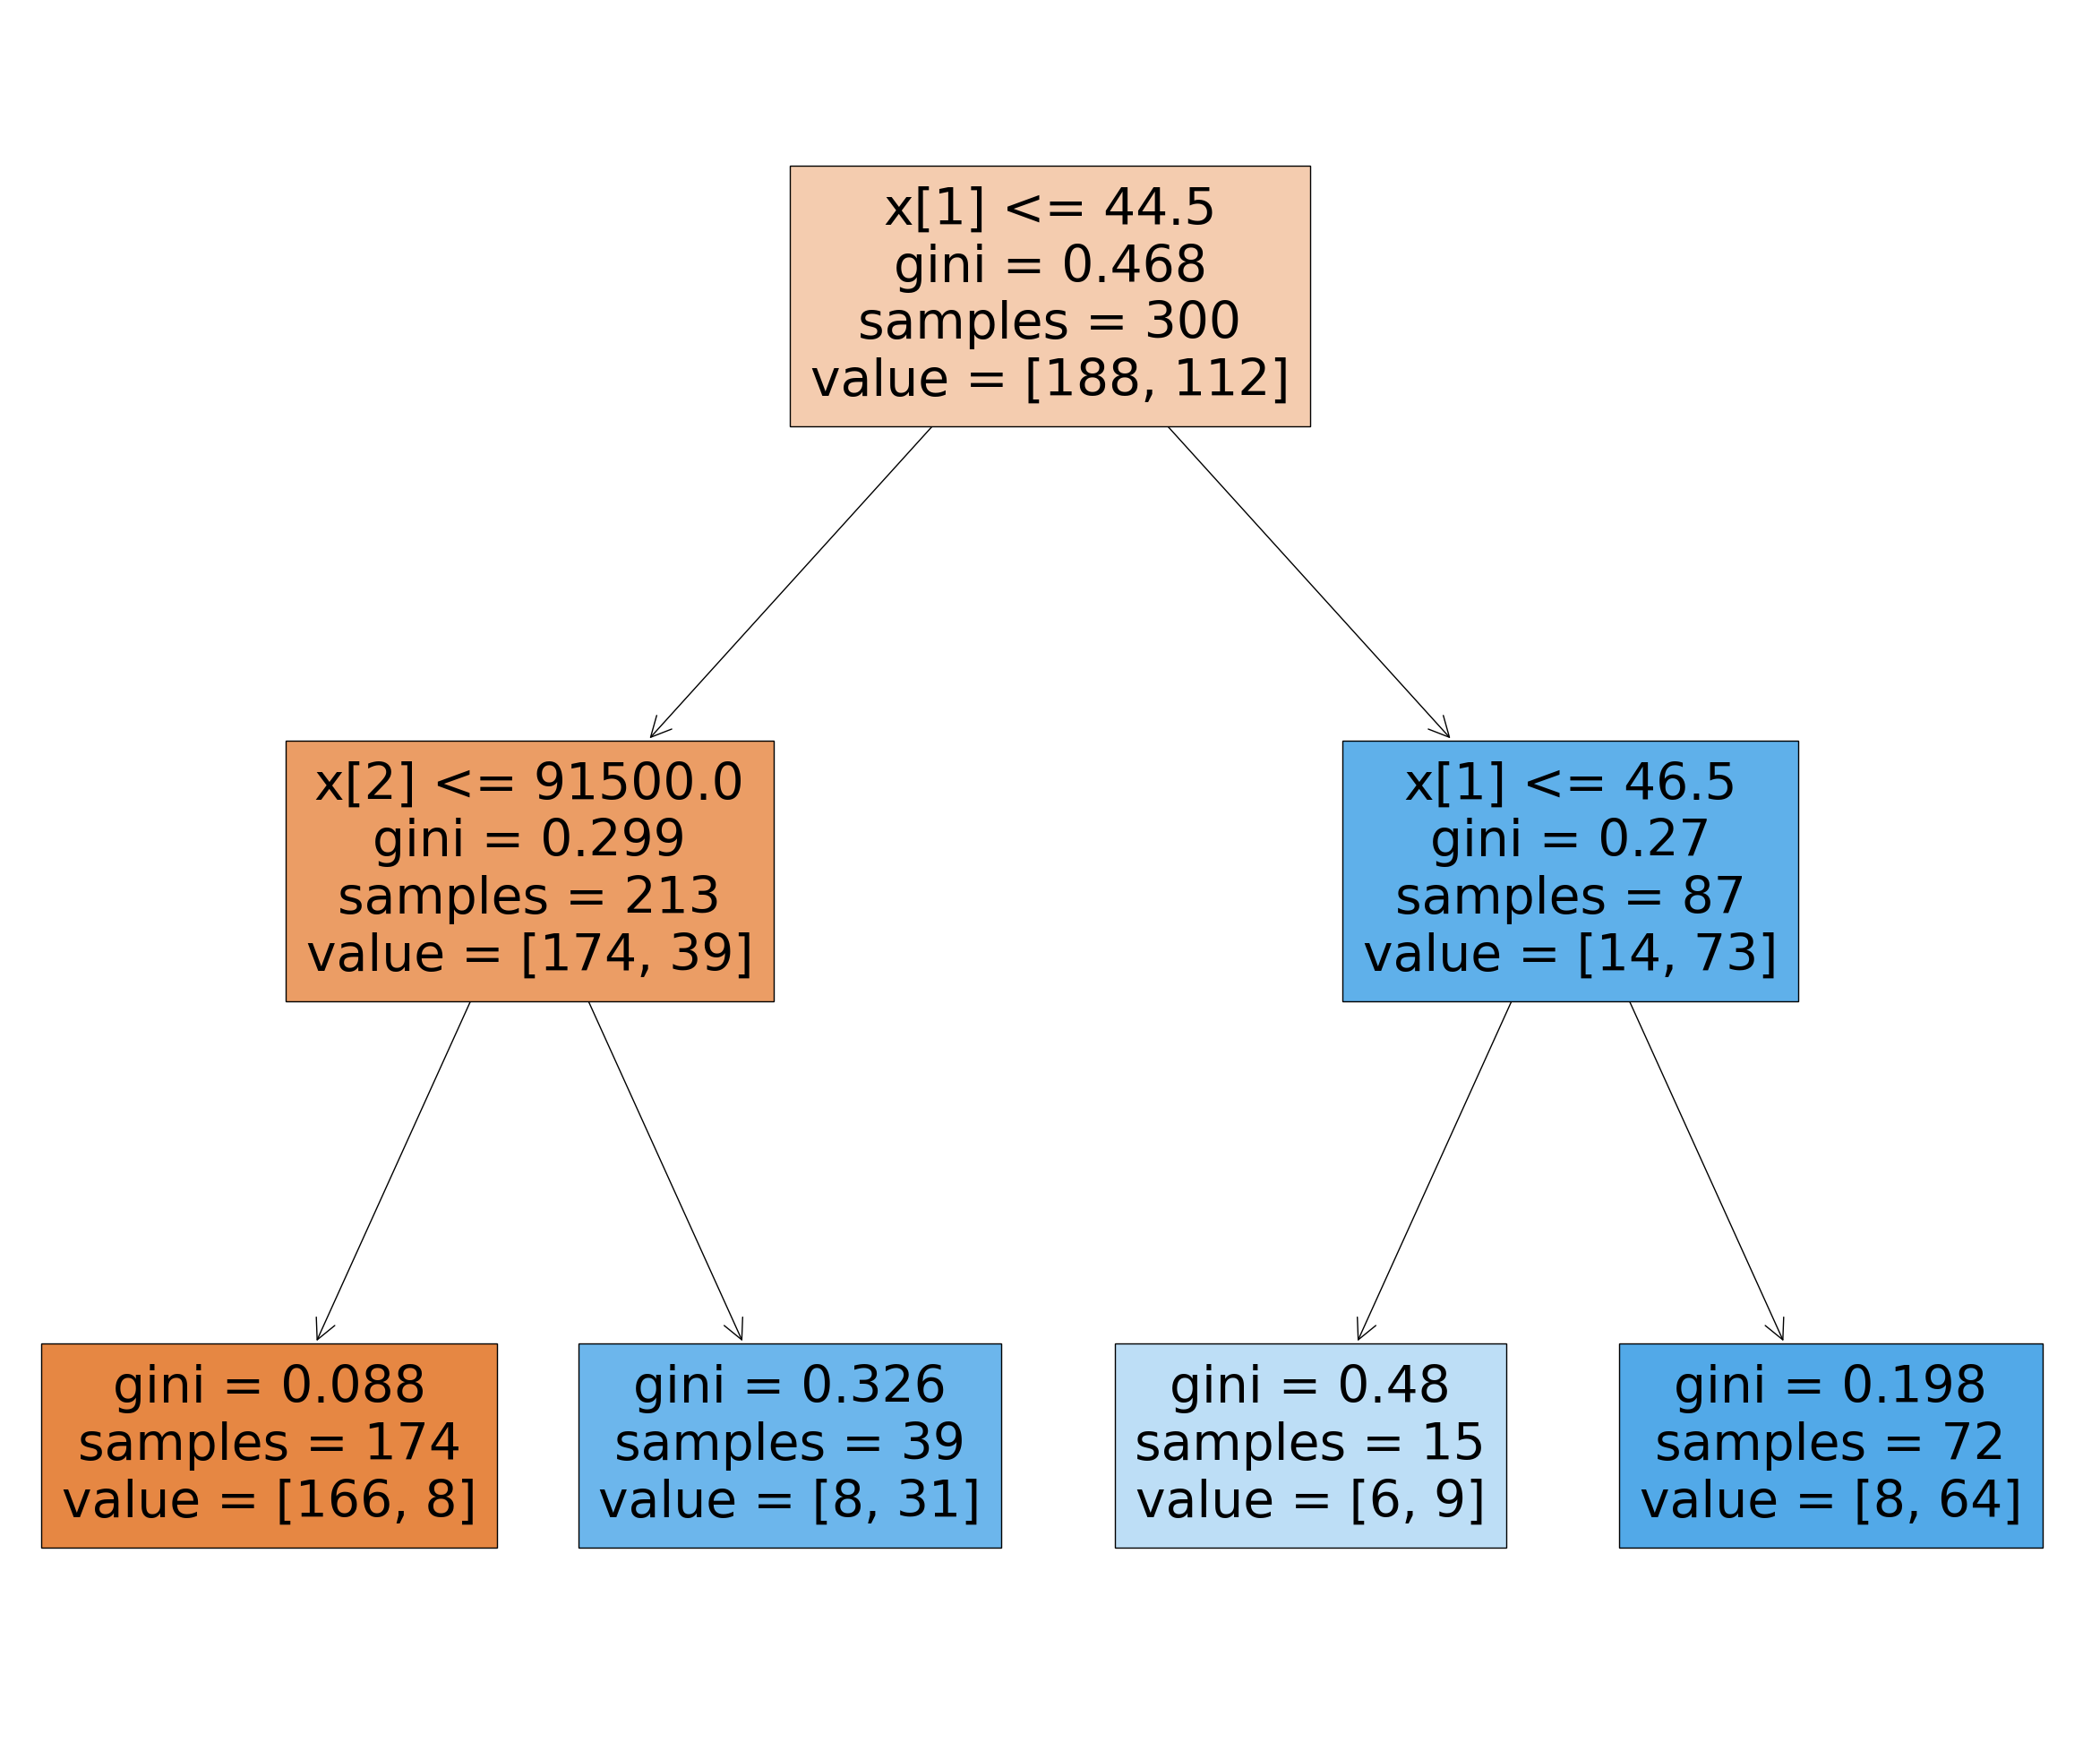

In [53]:
plt.figure(figsize=(30,25))
tree.plot_tree(treeclassifer,filled=True)
plt.show()

In [49]:
ypred = treeclassifer.predict(Xtest)

In [50]:
ypred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
ytest

115    0
186    0
366    1
81     0
314    0
      ..
221    1
51     0
14     0
241    0
71     0
Name: Purchased, Length: 100, dtype: int64

In [52]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy Score :{accuracy_score(ypred,ytest)}")
print(f"\n classification Report :\n {classification_report(ypred,ytest)}")

Accuracy Score :0.96

 classification Report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.94      0.94      0.94        31

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100

